In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import integrate, interpolate

In [2]:
def accr(x,af):

    xx = [0, 9, 10, 19, 20, 21,  22,  30, 31, 40, 41, 50, 51, 100]
    yy = [0, 0, 1, 1,  0,  0, -1, -1,  0,  0, -1, -1,  0,   0]
    fq = interpolate.interp1d(xx,yy,kind = 'linear')#'quadratic')
    return fq(x)*af

    # if x<0:
    #     return 0
    # elif 0<=x<10:
    #     return x*af
    # elif 10<=x<20:
    #     return (10-(x-10))*af
    # elif 20<=x<30:
    #     return 0
    # elif 30<=x<40:
    #     return -20*af
    # else:
    #     return 0
    # elif 30<=x<40:
    #     return (-10+(x-30))*af
    # elif 40<=x<50:
    #     return ((40-x))*af
    
    # else:
    #     return -10*af

In [3]:
accfactor = 0.01

In [4]:
def build_vel(x,af,start,end,space):
    xx = np.arange(start,end,space)
    yy = [integrate.quad(accr,0,i,args=(af,),limit=500)[0] for i in xx]
    return xx,yy

xx, yy = build_vel(0,1,0,100,1)

def vel(x,af,xx,yy):
    fq = interpolate.interp1d(xx,yy,kind = 'quadratic')#'linear')
    return fq(x)

/tmp/ipykernel_25214/474784655.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  yy = [integrate.quad(accr,0,i,args=(af,),limit=500)[0] for i in xx]


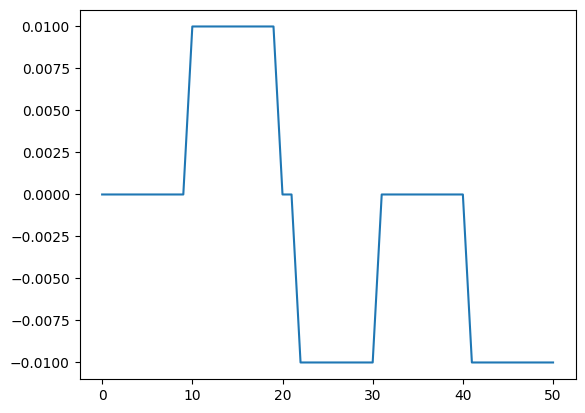

In [5]:
# def main():
#---------------
    # x = [2*math.pi*i/50 for i in range(201)]
    # y1 = [math.sin(i) for i in x]
    # y = [integrate.quad(lambda t:integrate.quad(math.sin,0,t,args=())[0],0,i,args=())[0] for i in x]

    # xx = [xv for i,xv in enumerate(x) if i % 2 == 0]
    # yy = [yv for i,yv in enumerate(y) if i % 2 == 0]
    # plt.plot(xx,yy,x,y1)
#---------------
x = [i for i in range(51)]
ya = [accr(i,accfactor) for i in x] # accerelation

# plt.plot(x,ya,x,yv,x,ys)
plt.plot(x,ya)

plt.show()

    # for i in range(101):
    #     x= 2*math.pi*i/100
    #     print(i, x, math.cos(x))

# if __name__ == '__main__':
#     main()

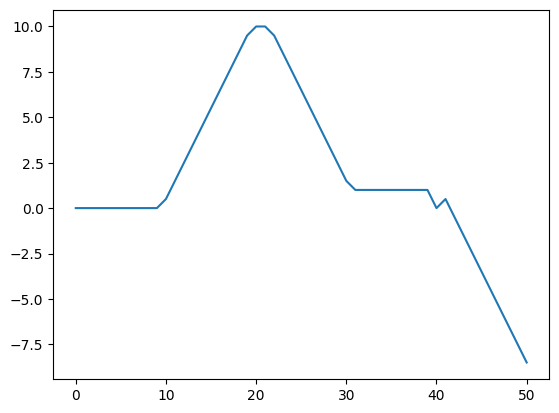

In [6]:
# yv = [integrate.quad(accr,0,i,args=(accfactor,),limit=500)[0] for i in range(51)] # velocity
yv = [vel(i,accfactor,xx,yy) for i in range(51)] # velocity

plt.plot(x,yv)
plt.show()

/tmp/ipykernel_25214/963023816.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ys = [integrate.quad(vel,0,i,args=(accfactor,xx,yy))[0] for i in range(51)] # distance


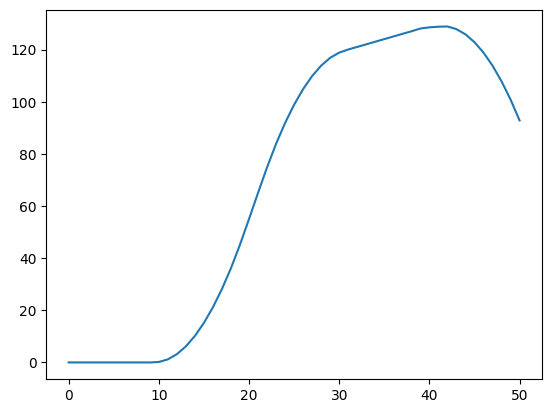

In [7]:
# ys = [integrate.quad(lambda t:integrate.quad(accr,0,t,args=(accfactor,))[0],0,i)[0] for i in range(51)] # distance
ys = [integrate.quad(vel,0,i,args=(accfactor,xx,yy))[0] for i in range(51)] # distance
plt.plot(x,ys)
plt.show()